**Notes**:
* Feel free to add cells as you need them.
* Keep your code clean and readable.
* Comments included in this document are just to summarize the question. For full details make sure you read the assignment pdf thoroughly.
* Don't forget to rename the file when you finish

# EECS 461/ECE 523  | Assignment 2

### Assignment Overview: 
In this assignment, you will be running exploratory analysis on a dataset to better understand it and its features. You will then be processing and preparing the data to apply the machine learning knowledge you’ve obtained through the lectures. This will include creating, analysing and generating predictions with classification models. You are expected to rimarily use Scikit-Learn in the assignment. 

### Data Set: 
The data set provided for this assignment contains pixel information of many 28x28 grayscale images of clothing, similar to the MNIST dataset. Each image is labelled as one of  the 10 different pieces of clothing: 
**class_labels = [T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot]**

The value of a row in the column “label” corresponds to the index of the item in the class_labels list. Data is in CSV format and has already been split into training and test sets for your convenience: train.csv: the training set, test.csv: the test set. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## DATA PREPARATION & VISUALIZATION 

In the first part of the assignment, you will analyze the dataset and preprocess it in order to prepare it for using machine learning algorithms. In this data set, our target variable is “label” while the others are our features.

In [3]:
class_labels = {
     "T-shirt/top" : 0,
     "Trouser" : 1,
     "Pullover" : 2,
     "Dress" : 3,
     "Coat" : 4,
     "Sandal" : 5,
     "Shirt" : 6,
     "Sneaker" : 7,
     "Bag" : 8,
     "Ankle boot" : 9
}

In [4]:
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv", index_col =0)

In [5]:
train.shape

(30001, 785)

In [6]:
test.shape

(5001, 785)

In [7]:
#Dataset is big enough. Therefore, we need to do sampling in order to reduce execution time for some parts in assignment. 

train_reduced = train.sample(frac = 0.20, replace = False, random_state = 0)
test_reduced = test.sample(frac = 0.20, replace = False, random_state = 0)

#Transforming to DataFrame
train_reduced = pd.DataFrame(train_reduced)
test_reduced = pd.DataFrame(test_reduced)

In [8]:
train_reduced.shape

(6000, 785)

In [9]:
test_reduced.shape

(1000, 785)

### a)  Split your data into X and y:

As mentioned, each instance in the training data contains a label value along with 784 pixels. Create two pandas data frames using **train.csv**, one containing all the input features and the other containing the target label only. Name these data frames as **train_x_a** and **train_y** respectively. Repeat the same steps ​using ​test.csv​ to create the variables **test_x, test_y**. 

In [10]:
train_x_a = train_reduced.drop("label", axis=1)
train_y = pd.DataFrame(train_reduced.label) 
test_x = test_reduced.drop("label", axis=1)
test_y = pd.DataFrame(test_reduced.label)

In [11]:
#transform train_y and test_y to DataFrame
train_y = pd.DataFrame(train_y)
test_y = pd.DataFrame(test_y)

### b)  Visualizing the data:

Write a function **plot_image** that will take a **pandas rows** of pixels as input and plot the resulting 28x28 image. 

In [12]:
def plot_image(row):
    n_images = len(row)
    columns = 10
    rows = n_images / columns
    fig=plt.figure(figsize=(columns*2, rows*2))
    for i in range(n_images):
        img = row[i].reshape(28,28)
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()


### c) Class visualization:

Using the function written in (b), plot 3 instances of each class in the training set. 

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


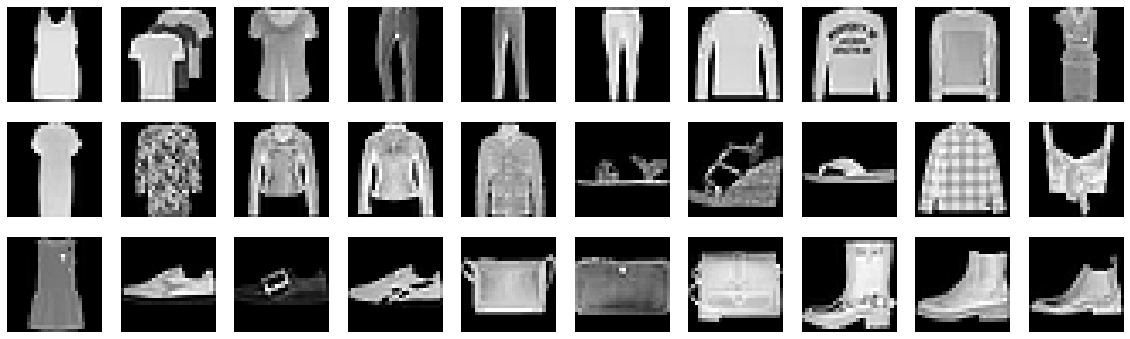

In [13]:
examples = []
# Take 3 of each class labels
for k in class_labels.values():
    indices = np.where(train_y == k)
    row = np.take(train_x_a.values, indices[0][:3], axis=0)
    examples = examples + [x for x in row]


print(class_labels)
plot_image(examples)

### d) Average visualization:

Using the function written in (b), plot the average image for each class in the training set. The average image for each class is calculated by taking the mean of each pixel column for that class. 

In [14]:
classes = []
for i in range(0, len(class_labels)):
    classes.append(i)
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
# function for finding the indices of classes
def label_index (index):
    return(train_y.loc[train_y['label']==classes[index]].index.tolist())
label_index(0)

[16290,
 19825,
 28367,
 4806,
 27465,
 25516,
 10361,
 27285,
 1169,
 1797,
 22181,
 23436,
 13204,
 29980,
 7476,
 11774,
 19303,
 29497,
 883,
 22960,
 2255,
 19668,
 2769,
 8834,
 12301,
 25327,
 27474,
 21787,
 23499,
 29191,
 21452,
 20357,
 19326,
 24990,
 28483,
 1550,
 19765,
 20081,
 2161,
 4984,
 21833,
 29048,
 15195,
 12727,
 4433,
 14845,
 27897,
 19619,
 17516,
 1500,
 29686,
 15078,
 28146,
 29485,
 23494,
 16728,
 6752,
 10054,
 6785,
 21394,
 26924,
 4843,
 1870,
 22131,
 9129,
 25627,
 23020,
 19152,
 4800,
 11759,
 13055,
 22976,
 12077,
 23439,
 12253,
 3226,
 16479,
 1419,
 15634,
 25891,
 4068,
 2972,
 24716,
 24545,
 19754,
 11017,
 27573,
 26354,
 28921,
 5559,
 8277,
 8316,
 5153,
 25890,
 3042,
 18184,
 29546,
 29640,
 15817,
 24473,
 16203,
 9763,
 24244,
 10944,
 4137,
 6497,
 28399,
 15020,
 9115,
 11046,
 1584,
 15234,
 14382,
 9937,
 325,
 27164,
 14715,
 10766,
 14414,
 7240,
 18354,
 26674,
 15799,
 10792,
 934,
 24711,
 23064,
 6882,
 6783,
 17256,
 1

In [16]:
#function for finding means of each class in each column
def label_mean(index):
    return(train_x_a.loc[label_index(index)].mean())
label_mean(9)

pixel1       0.000000
pixel2       0.027350
pixel3       0.027350
pixel4       0.027350
pixel5       0.027350
              ...    
pixel780    10.152137
pixel781    10.596581
pixel782     7.729915
pixel783     3.070085
pixel784     0.309402
Length: 784, dtype: float64

In [17]:
#all means of each class to data frame
for i in range (0, 10):
    a = pd.DataFrame([label_index(i)])
label_means = pd.DataFrame([label_mean(0), label_mean(1), label_mean(2), label_mean(3), label_mean(4), label_mean(5), label_mean(6), label_mean(7), label_mean(8), label_mean(9)]).to_numpy()
print(label_means)

[[0.00000000e+00 4.73933649e-03 1.34281201e-01 ... 8.84676145e-02
  1.73775671e-02 3.15955766e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.04568528e-01
  5.75296108e-02 0.00000000e+00]
 [0.00000000e+00 6.67779633e-03 3.33889816e-02 ... 8.85642738e+00
  1.64106845e+00 1.93656093e-01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.06844741e-01
  1.31886477e-01 0.00000000e+00]
 [0.00000000e+00 8.53242321e-03 1.02389078e-02 ... 4.28668942e+00
  2.60921502e+00 3.24232082e-01]
 [0.00000000e+00 2.73504274e-02 2.73504274e-02 ... 7.72991453e+00
  3.07008547e+00 3.09401709e-01]]


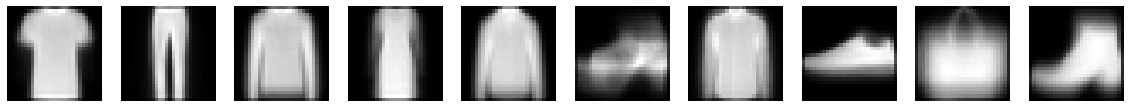

In [18]:
# average image for each class in the training set
plot_image(label_means)

## BINARY CLASSIFICATION

In the second part of the assignment, you will use Logistic Regression to perform binary classification using the pixel features in the dataset.

### e) Binary transformation:

To run binary classification we need to first transform our class labels to binary (0and1). If the item is a piece of clothing (T-shirt/top, Pullover, Shirt, Trouser, Dress, or Coat), label it as 1 and and if the item is non-clothing (Sandal, Sneaker, Bag, or Ankle boot), label it as 0. Store the result in a variable called **train_y_e**. Follow the same steps to create binary labels for the test set’s target column. Name this variable **test_y_e**.

In [19]:
# piece of clothing classes as 1, others as 0 in train_y set
train_y_e = train_y.replace(to_replace = [0, 1, 2, 3, 4, 6], value = 1 )
train_y_e = train_y_e.replace(to_replace = [5, 7, 8, 9], value = 0 )

In [20]:
# piece of clothing classes as 1, others as 0 in test_y set
test_y_e = test_y.replace(to_replace = [0, 1, 2, 3, 4, 6], value = 1 )
test_y_e = test_y_e.replace(to_replace = [5, 7, 8, 9], value = 0 )

### f) Binary Classification Model

Create a Logistic Regression model with default parameters. Perform 5-fold Cross Validation on the training data and report the mean accuracy. 

In [21]:
#create a model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(train_x_a, train_y_e)

LogisticRegression()

In [22]:
#5-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
train_mse_score = cross_val_score(log_model, train_x_a, train_y_e, cv=5, scoring = 'accuracy')

#print mean accuracy
print(train_mse_score.mean())

0.9818333333333333


### g) Predict test data:

Train the model with **train_x_a** and **train_y_e** and predict the labels of **test_x**. Report the **accuracy, confusion matrix, precision, recall** and **f1 score** of these predictions. 

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# train the model
test_y_predict = log_model.predict(test_x)
print(test_y_predict)

# plot confusion matrix
confusion_matrix = confusion_matrix(test_y_e, test_y_predict)
print(confusion_matrix)

# print(accuracy, precision, recall, f1_score)
log_accuracy = accuracy_score(test_y_e, test_y_predict)
log_precision = precision_score(test_y_e, test_y_predict)
log_recall = recall_score(test_y_e, test_y_predict)
log_f1_score = f1_score(test_y_e, test_y_predict)


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_recall)
print("Logistic F1 Score: ", log_f1_score)

[1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0
 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1
 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0
 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0
 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 0 

### h) Model evaluation:

Plot the above model’s precision-recall curve and ROC curve. Report the ROC area under the curve (AUC) score. 

In [24]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(test_y_e, test_y_predict)

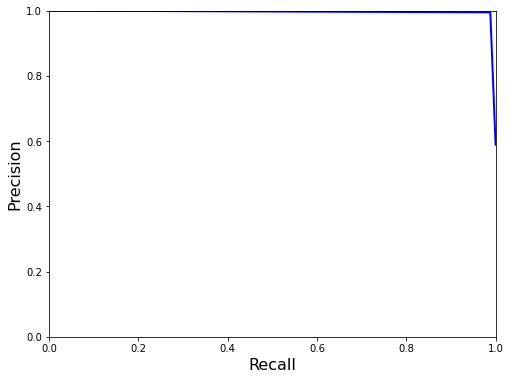

In [25]:
# plot precision-recall curve
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

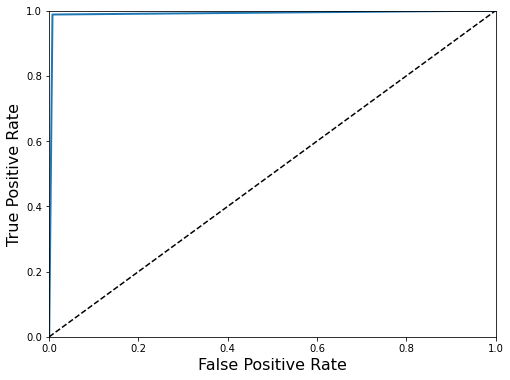

In [26]:
#plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y_e, test_y_predict)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [27]:
#print AUC score
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y_e, test_y_predict)

0.9904080899210589

### i) Learning curves:

Plot the learning curve of a logistic regression model with default parameters by using train_x_a. Increase the data size by 100 at each step. For both train and validation, report classification accuracy.

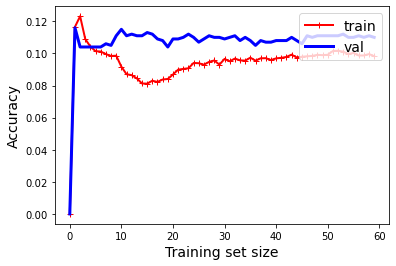

In [28]:
#plot learning curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    train_errors, val_errors = [], [],
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
    for m in range(3, len(train_x_a), 100):
        model.fit(train_x_a[:m], train_y[:m])
        y_train_predict = model.predict(train_x_a[:m])
        y_val_predict = model.predict(test_x)
        train_errors.append(accuracy_score(y_train_predict, train_y_e[:m]))
        val_errors.append(accuracy_score(y_val_predict, test_y_e))
        
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)              
plot_learning_curves(log_model, train_x_a, train_y_e)

## MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

In the third part of the assignment, you will use logistic regression to perform multiclass classification with the original dataset labels. 

### j) Training and cross validating logistic regression:

Use **train_x_a** and **train_y** to perform 3-fold cross validation on a logistic regression model with default parameters. with cv=3. Report the mean accuracy. 

In [29]:
# 3 fold Cross Validation on train_x_a and train_y
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_acc_score = cross_val_score(log_reg, train_x_a, train_y, cv=3, scoring = 'accuracy')
print(log_acc_score.mean())

0.8075000000000001


### k) testing logistic regression:

Fit a logistic regression model on the training set (**train_x_a, train_y**) and calculate its **test accuracy** by using **test_x**. Print the model’s **confusion matrix** on the test set. 

In [30]:
from sklearn.metrics import confusion_matrix

# fit model 
log_reg.fit(train_x_a, train_y)
print(log_model.score(train_x_a, train_y))

# test model
test_y_predict = log_reg.predict(test_x)
print(test_y_predict)

# print confusion matrix
log_accuracy = accuracy_score(test_y, test_y_predict)
log_conf_matrix = confusion_matrix(test_y, test_y_predict)
print("Logistic Accuracy: ", log_accuracy)
print( log_conf_matrix)

0.917
[4 9 9 6 4 3 8 9 3 1 6 8 1 0 8 1 2 4 3 5 4 1 9 9 7 9 8 5 0 5 4 9 4 6 0 6 5
 6 4 0 7 9 7 5 6 0 6 8 2 9 1 0 1 8 8 0 7 3 6 9 6 0 5 5 9 0 8 8 0 4 0 1 4 4
 6 7 5 9 0 8 3 1 3 2 1 1 8 2 0 2 5 8 5 0 0 6 0 8 8 1 5 5 9 1 3 1 8 7 4 1 8
 7 5 0 9 1 4 3 5 5 2 9 3 0 3 6 3 3 8 3 7 4 9 6 5 0 4 7 4 3 2 5 8 0 2 6 2 9
 9 1 3 3 9 8 9 4 4 7 7 4 7 3 4 8 9 1 5 8 8 3 7 1 5 8 2 3 4 6 1 9 2 5 0 7 1
 3 1 2 8 1 6 2 2 8 7 1 0 1 5 7 4 4 3 0 1 9 6 2 3 8 0 1 1 0 1 2 4 6 6 2 0 0
 0 9 9 9 7 5 1 0 3 3 8 7 8 7 6 8 2 1 1 4 6 2 0 1 8 1 1 6 9 0 8 8 4 5 7 9 6
 4 2 1 4 1 8 0 1 2 6 9 2 0 8 4 4 6 9 4 7 9 0 3 7 9 6 4 7 8 4 5 0 7 4 6 8 1
 7 8 3 1 5 9 5 9 9 8 8 5 6 2 2 1 9 7 5 7 2 6 1 4 5 6 5 4 8 6 6 1 4 6 4 0 5
 1 6 0 2 7 4 0 4 2 3 0 2 2 9 5 5 8 4 1 7 0 1 8 3 5 4 6 1 4 0 1 8 8 1 9 3 6
 7 0 3 9 1 7 2 8 3 3 8 6 7 6 0 2 1 8 0 2 1 0 6 7 9 5 6 7 4 8 8 4 8 7 3 1 5
 9 5 4 8 2 4 8 9 1 0 2 3 1 7 3 0 0 7 2 5 1 7 0 5 4 1 7 7 5 2 2 5 0 1 5 0 8
 4 6 1 6 8 1 5 7 0 0 2 1 5 6 3 4 9 5 5 0 2 9 2 8 1 5 9 7 2 7 0 6 5 3 5 8 1
 9 3 8 5 8 5 7 5 3 

## MULTICLASS CLASSIFICATION USING SVR

In the fourth part of the assignment, you will use an SVM Classifier (sklearn’s SVC) to perform multiclass classification using the pixel features in the dataset.

### l) Grid search to find best model:

In order to perform Multiclass Classification, you will need to utilize SVC. However, SVC has large hyper parameter set. To find the best combination you will be using gridsearch. Using the below parameters, run GridSearchCV (cv = 5) with an SVC model on the **train_x_a** and **train_y**. Print out the best model’s parameters and accuracy.

<img src="image.png">
 
 

In [31]:
# Grid Search
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 0.5, 1.0, 5.0, 10.], 'tol': [0.0001, 0.001, 0.1], 'decision_function_shape': ['ovo', 'ovr']}
       
# Support Vector Machine
svc_reg = SVC()
grid_search = GridSearchCV(svc_reg, parameters, cv=5, scoring = 'accuracy')
grid_search.fit(train_x_a, train_y)

best_grid_parameters = grid_search.best_params_

print(best_grid_parameters)

{'C': 10.0, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'tol': 0.0001}


### m)Testing the best model:

Recreate a model using the best parameters in **(l)** and calculate its **test accuracy**. Print the model’s **confusion matrix** on the test set.

In [32]:
from sklearn.metrics import accuracy_score

final_model = grid_search.best_estimator_

test_y_predict = final_model.predict(test_x)

# calculate test accuracy
final_accuracy = accuracy_score(test_y, test_y_predict)
print("Final Accuracy: ", final_accuracy)

# print confusion matrix
print(confusion_matrix(test_y, test_y_predict))

Final Accuracy:  0.882
[[ 80   1   2   4   0   0  10   0   2   0]
 [  0 106   1   2   0   0   0   0   0   0]
 [  2   0  71   0   8   0   3   0   1   0]
 [  2   0   2  81   2   0   1   0   1   0]
 [  0   1   5   4  91   0   4   0   0   0]
 [  0   0   0   0   0  87   1   6   1   3]
 [ 10   0  15   3   6   0  68   0   0   0]
 [  0   0   0   0   0   4   0  91   0   4]
 [  0   0   0   1   0   1   1   1 105   1]
 [  0   0   0   0   0   0   0   2   0 102]]


## MULTICLASS CLASSIFICATION USING DECISION TREES

In the fifth part of the assignment, you will use a decision trees to perform multiclass classification.

### n) Grid Search to find best model:

Using the below parameters, run GridSearchCV (cv = 5) with a decision tree model on the **train_x_a** and **train_y**. Print out the best model’s parameters and accuracy. 

<img src="image1.png">

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'min_samples_split' : [2,3,4],'max_depth': [2,4,10]}

tree = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5, scoring = 'accuracy')
tree.fit(train_x_a, train_y)

best_tree_parameters = tree.best_params_
print(best_tree_parameters)

{'max_depth': 10, 'min_samples_split': 4}


### o) Testing the best model:

Recreate a model using the best parameters in **(n)** and calculate its **test accuracy**. Print the model’s **confusion matrix** on the test set. 

In [34]:
final_model = tree.best_estimator_

test_y_predict = final_model.predict(test_x)

# calculate test accuracy
final_accuracy = accuracy_score(test_y, test_y_predict)
print("Final Accuracy: ", final_accuracy)

# print confusion matrix
print(confusion_matrix(test_y, test_y_predict))

Final Accuracy:  0.764
[[75  1  8  3  0  0 11  0  1  0]
 [ 4 98  2  4  0  1  0  0  0  0]
 [ 2  0 58  0 20  0  5  0  0  0]
 [ 4  1  5 70  4  0  3  0  2  0]
 [ 0  1 14  2 76  0 11  0  1  0]
 [ 1  0  0  1  0 78  1  8  3  6]
 [13  0 27  3 12  0 47  0  0  0]
 [ 0  0  1  0  0  9  0 80  1  8]
 [ 1  1  4  1  3  1  2  1 94  2]
 [ 0  0  0  1  0  4  1  8  2 88]]
